In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

***DATA***

https://www.openml.org/d/1597

It contains only numerical input variables which are the ***result of a PCA transformation***. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
data = pd.read_csv('Credit_Card_Fraud.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


## Convert [0,1] to [-1,1]

In [4]:
# rename the transaction with 'Normal' or 'Fraud'

data['Class'] = data['Class'].map(lambda x: -1 if x=="'1'" else 1)

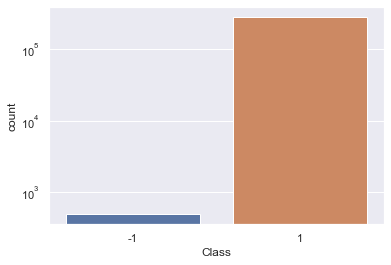

In [5]:
fig, ax= plt.subplots()
sns.countplot(x='Class', data=data, ax=ax)
plt.yscale('log')

## Train_test_split

In [6]:
from sklearn.model_selection import train_test_split

## Steps
#### 1. load the data
#### 2. train_test_split the data => x_train and x_test
#### 3. Divide x_train into 'normal' and 'anomalous' dataset => x_train (drop anomalies) and y_train
#### 4. A One-Class Support Vector Machine is an unsupervised learning algorithm that is trained only on the ‘normal’ data
https://towardsdatascience.com/outlier-detection-with-one-class-svms-5403a1a1878c

In [18]:
x_train, x_test = train_test_split(data, test_size=0.2, random_state=42)

# ****** Training
y_train = x_train['Class'] # y_train is used to define labels

# drop Class column along with anomalies
# consider only data without labels
x_train = x_train[x_train.Class==1].drop(columns=['Class'])

# **** Testing
y_test = x_test['Class']
x_test = x_test.drop(columns=['Class'])

print(x_train.shape, y_train.shape)

# 'y_train' and 'y_test' has labels and thus define the number of 1 and -1 class
#print('Train DataSet: \n', pd.value_counts(y_train))
#print('***************')
#print('Test DataSet: \n', pd.value_counts(y_test))



#Xtrain[Xtrain.Class == 1].drop(['Class'], axis=1)

(227451, 30) (227845,)


# One Class SVM

In [8]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [9]:
oc_svm = svm.OneClassSVM(nu=0.0007, kernel='rbf', gamma=0.04)

In [10]:
%%time
oc_svm.fit(x_train)

CPU times: user 1h 13min 5s, sys: 48.8 s, total: 1h 13min 53s
Wall time: 1h 13min 56s


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.04, kernel='rbf',
            max_iter=-1, nu=0.0007, shrinking=True, tol=0.001, verbose=False)

In [11]:
%%time
y_pred = oc_svm.predict(x_test)

CPU times: user 5min 50s, sys: 220 ms, total: 5min 50s
Wall time: 5min 50s


## Confusion Matrix

Text(39.5, 0.5, 'True Class')

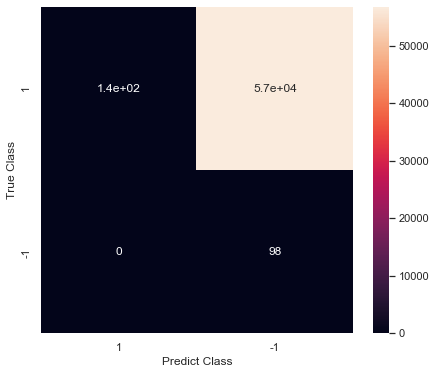

In [12]:
labels = [1,-1]

conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True, ax=ax)
ax.set_xlabel('Predict Class')
ax.set_ylabel('True Class')

Text(39.5, 0.5, 'True Class')

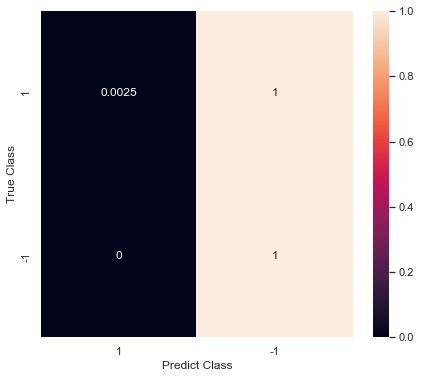

In [13]:
# Normalized Confusion Matrix

conMat = conf_mat.astype('float')/conf_mat.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(conMat, xticklabels=labels, yticklabels=labels, annot=True, ax=ax)
ax.set_xlabel('Predict Class')
ax.set_ylabel('True Class')

***Precision*** = It describes how good a model is at predicting the positive class. 

## $ Precision = \frac{T_p}{T_p + F_p} $
***Recall*** = What proportion of actual positives was identified correctly?
## $Recall = \frac{T_p}{T_p + F_n}  $

***We are more interested in Recall because of anomaly (-1)***

In [14]:
from sklearn.metrics import recall_score, precision_score

print("Precision = {}".format(precision_score(y_test, y_pred, pos_label=-1)))
print("Recall = {}".format(recall_score(y_test, y_pred, pos_label=-1)))

Precision = 0.001724805519377662
Recall = 1.0


Hence, we are able to identify correctly $98$ of the $98$ fraud (In fact we have a good recall)

In [15]:
from sklearn.metrics import roc_curve, precision_recall_curve

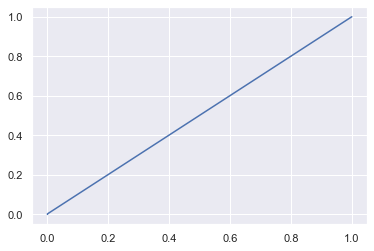

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RF')

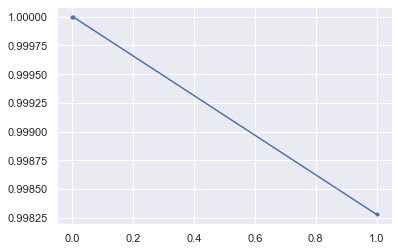

In [17]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.', label='OCSVM')